In [5]:
import sys
!{sys.executable} -m pip install matplotlib

    100% |████████████████████████████████| 14.1MB 643kB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 26.2MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 112kB 27.9MB/s ta 0:00:01


In [6]:
import pandas as pd
from datetime import datetime
import os
import matplotlib.pyplot as plt

In [45]:
# Import csv
fpath = "GBPUSD_2018.csv"
df = pd.read_csv(fpath)

# Process columns
df.columns = ["date", "time", "val", "B", "C", "D", "E"] # QUESTION about additional columns
df = df.drop(columns=['B', 'C', 'D', 'E'])

# Process datetime
df['datetime'] = df["date"].map(str) + " " + df["time"] # create datetime column
df["datetime"] = pd.to_datetime(df["datetime"])
df["date"] = pd.to_datetime(df["date"]) # datetime-ify 'date time' column
df = df.set_index('datetime')
df = df[['date', 'time', 'val']]
df = df.drop(columns=['time', 'date'])

In [46]:
mdf = df.between_time('10:30', '11:02')
mdf

,val
datetime,
2018-01-02 10:30:00,1.35494
2018-01-02 10:31:00,1.35473
2018-01-02 10:32:00,1.35473
2018-01-02 10:33:00,1.35465
2018-01-02 10:34:00,1.35465
2018-01-02 10:35:00,1.35473
2018-01-02 10:36:00,1.35508
2018-01-02 10:37:00,1.35519
2018-01-02 10:38:00,1.35535


In [47]:
df_1030 = df.between_time('10:30', '10:30')
df_1045 = df.between_time('10:45', '10:45')
df_1102 = df.between_time('11:02', '11:02')

In [10]:
print(df_1030.loc['2018-01-02 10:30:00']['val'])

1.35494


### Note to self
- `df[COL][INDEX]`
- When accessing a dataframe through index, use `df.loc[idx]` to identify the row, use `df.loc[idx]['col_x']` to further locate a data

## Questions to investigate

For each day's 10:30 - 11:02 timeframe (we ignore data from the rest of the day), we analyze minutely data and their relationship with the 10:30 and 10:45 prices

1.  Find the max pip movement above and below the 10:30 and 10:45 prices within the timeframe.
2.  Find if the timeframe was long/short relative to 1) the 10:30 price, and 2) the 10:45 price; we achieve this by comparing the 11:02 price with the 10:30 and 10:45 prices, respectively. 
3. The average for distance moved for and against 10:30 and 10:45 entries

### Q1 Algorithm
Find the max pip movement above and below the 10:30 and 10:45 prices within the timeframe.
- First, isolate each day's data in 10:30 - 11:02 [DONE]
- Then, store 10:30 and 10:45's price. [DONE]
- Iterate through each minute to find pip movement. Update pip if larger movement is found. 

```
datetime: {
    max_pip_1030: p
    max_pip_1045: q
}
```

Note:
It would be nice to know which minute's data resulted in this max pip movement

### Q2 Algorithm
Find if the timeframe was long/short relative to 1) the 10:30 price, and 2) the 10:45 price; we achieve this by comparing the 11:02 price with the 10:30 and 10:45 prices, respectively. 

In [118]:
current_date = None
price_1030 = None
price_1045 = None

mpip = {} #key: date; value: max_pip
col_max_pip_1030 = '1030_MAX_PIP'
col_max_pip_1045 = '1045_MAX_PIP'
col_max_pip_1030_dt = "1030_DATETIME_MPIP"
col_max_pip_1045_dt = "1045_DATETIME_MPIP"
col_max_pip_1030_price = "1030_PRICE_MPIP"
col_max_pip_1045_price = "1045_PRICE_MPIP"


long_short_tf = {} #key: date; value: if day was long or short
col_ls_1030 = '1030_LS'
col_ls_1045 = '1045_LS'
col_1030_price = '1030_PRICE'
col_1045_price = '1045_PRICE'
col_1102_close_price = '1102_CLOSE'

### Solve Q1, Q2 by iterating through the morning dataframe (10:30-11:02, daily)

In [138]:
for index, row in mdf.iterrows():
    
    if index.date() != current_date:
        # Initialize mpip data and store 10:30 & 10:45 prices. 
        current_date = index.date()
        mpip[current_date] = { 
            col_max_pip_1030: 0, 
            col_max_pip_1045: 0, 
            col_max_pip_1030_dt: 0, 
            col_max_pip_1045_dt: 0, 
            col_max_pip_1030_price: 0, 
            col_max_pip_1045_price: 0
        }
        long_short_tf[current_date] = {
            col_ls_1030: 'N/A', 
            col_ls_1045: 'N/A', 
            col_1030_price: 'N/A', 
            col_1045_price: 'N/A',
            col_1102_close_price: 'N/A'
        }
        df_1030_idx = str(current_date) + " 10:30:00"
        df_1045_idx = str(current_date) + " 10:45:00"
        price_1030 = df_1030.loc[df_1030_idx]['val']
        price_1045 = df_1045.loc[df_1045_idx]['val']
        mpip[current_date][col_1030_price] = price_1030
        mpip[current_date][col_1045_price] = price_1045
        
    # Record / update daily max pip movement compared to 10:30 & 10:45 prices 
    cur_pip_1030 = round((row['val'] - price_1030) * 10000, 4)
    cur_pip_1045 = round((row['val'] - price_1045) * 10000, 4)
    if cur_pip_1030 > mpip[current_date][col_max_pip_1030]:
        mpip[current_date][col_max_pip_1030] = cur_pip_1030
        mpip[current_date][col_max_pip_1030_dt] = index
        mpip[current_date][col_max_pip_1030_price] = row['val']
    if cur_pip_1045 > mpip[current_date][col_max_pip_1045]:
        mpip[current_date][col_max_pip_1045] = cur_pip_1045
        mpip[current_date][col_max_pip_1045_dt] = index
        mpip[current_date][col_max_pip_1045_price] = row['val']

    if str(index) == str(current_date) + " 11:02:00":
        # Record if the timeframe was long or short compared to 10:30 & 10:45 prices 
        long_short_tf[current_date][col_1030_price] = price_1030
        long_short_tf[current_date][col_1045_price] = price_1045
        long_short_tf[current_date][col_1102_close_price] = row['val']
        if row['val'] > price_1030: 
            long_short_tf[current_date][col_ls_1030] = 'LONG'
        elif row['val'] < price_1030: 
            long_short_tf[current_date][col_ls_1030] = 'SHORT'
        else: 
            long_short_tf[current_date][col_ls_1030] = 'PAR'
        if row['val'] > price_1045: 
            long_short_tf[current_date][col_ls_1045] = 'LONG'
        elif row['val'] < price_1045:
            long_short_tf[current_date][col_ls_1045] = 'SHORT'
        else: 
            long_short_tf[current_date][col_ls_1045] = 'PAR'

### Q1: Max pip movement result, tabulated & plotted

In [139]:
df_mpip = pd.DataFrame.from_dict(mpip, orient='index')
df_mpip = df_mpip[[col_max_pip_1030, col_1030_price, col_max_pip_1030_price, col_max_pip_1030_dt,\
                   col_max_pip_1045, col_1045_price, col_max_pip_1045_price, col_max_pip_1045_dt]]
df_mpip

,1030_MAX_PIP,1030_PRICE,1030_PRICE_MPIP,1030_DATETIME_MPIP,1045_MAX_PIP,1045_PRICE,1045_PRICE_MPIP,1045_DATETIME_MPIP
2018-01-02,31.5,1.35494,1.35809,2018-01-02 10:59:00,22.6,1.35583,1.35809,2018-01-02 10:59:00
2018-01-03,15.1,1.34995,1.35146,2018-01-03 10:57:00,4.0,1.35106,1.35146,2018-01-03 10:57:00
2018-01-04,3.0,1.35534,1.35564,2018-01-04 10:31:00,0.4,1.35560,1.35564,2018-01-04 10:31:00
2018-01-05,2.0,1.35622,1.35642,2018-01-05 10:33:00,10.8,1.35534,1.35642,2018-01-05 10:33:00
2018-01-08,27.3,1.35537,1.35810,2018-01-08 11:01:00,23.2,1.35578,1.35810,2018-01-08 11:01:00
2018-01-09,12.2,1.35157,1.35279,2018-01-09 10:55:00,7.0,1.35209,1.35279,2018-01-09 10:55:00
2018-01-10,2.0,1.35315,1.35335,2018-01-10 10:33:00,9.7,1.35238,1.35335,2018-01-10 10:33:00
2018-01-11,9.8,1.35334,1.35432,2018-01-11 10:43:00,3.8,1.35394,1.35432,2018-01-11 10:43:00
2018-01-12,15.8,1.36733,1.36891,2018-01-12 11:01:00,11.8,1.36773,1.36891,2018-01-12 11:01:00
2018-01-15,22.6,1.37839,1.38065,2018-01-15 11:01:00,11.4,1.37951,1.38065,2018-01-15 11:01:00


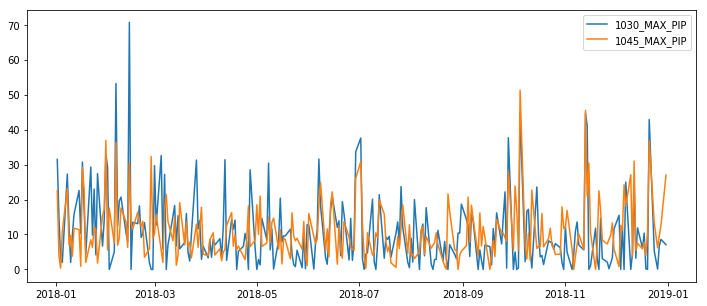

In [140]:
df_mpip[[col_max_pip_1030, col_max_pip_1045]].plot(figsize=(12, 5))

### Q2: Whether each daily timeframe is long/short compared against the 10:30 & 10:45 prices, tabulated

In [121]:
df_ls = pd.DataFrame.from_dict(long_short_tf, orient='index')
df_ls = df_ls[[col_ls_1030, col_1030_price, col_ls_1045, col_1045_price, col_1102_close_price]]
df_ls

,1030_LS,1030_PRICE,1045_LS,1045_PRICE,1102_CLOSE
2018-01-02,LONG,1.35494,LONG,1.35583,1.35774
2018-01-03,LONG,1.34995,LONG,1.35106,1.35134
2018-01-04,SHORT,1.35534,SHORT,1.35560,1.35509
2018-01-05,LONG,1.35622,LONG,1.35534,1.35629
2018-01-08,LONG,1.35537,LONG,1.35578,1.35796
2018-01-09,LONG,1.35157,LONG,1.35209,1.35210
2018-01-10,SHORT,1.35315,LONG,1.35238,1.35279
2018-01-11,LONG,1.35334,SHORT,1.35394,1.35379
2018-01-12,LONG,1.36733,LONG,1.36773,1.36855
2018-01-15,LONG,1.37839,LONG,1.37951,1.38031


daily direction. open price at 5pm the night before, 10:30 price, determine which direction the currency is going. 
-> determine the direction of the stick in relation with the daily direction.

artificially propped up. 

next test: price action from 11am, 11:20am, 12am to the end of the day. 

### Q3
how many days went against entry by 3 pips or less, 4 or less, etc. to 6 pips

In [11]:
def pip_mvmt(initial, final):
    return (final - initial) * 10000

In [16]:
def is_same_date(d1, d2):
    return (d1.year == d2.year) and (d1.month == d2.month) and (d1.day == d2.day)

In [41]:
def days_exceed_pip_mvmt(pipmvmt):
    """Compare 11:02 to 10:30 prices to see if exceeds pip mvmt.
    Returns a list of the dates exceeding movement. 
    """
    days = []
    for date, row in df_1102.iterrows():
        daily_close = row['val']
        daily_open = df_1030.loc[str(date.date()) + " 10:30:00"]['val']
        print("daily_open: {}, daily_close: {}".format(daily_open, daily_close))
        if pip_mvmt(daily_open, daily_close) > pipmvmt:
            days.append([date.date()])
    return days

In [37]:
df_1102

,date,val
datetime,,
2018-01-02 11:02:00,2018-01-02,1.35774
2018-01-03 11:02:00,2018-01-03,1.35134
2018-01-04 11:02:00,2018-01-04,1.35509
2018-01-05 11:02:00,2018-01-05,1.35629
2018-01-08 11:02:00,2018-01-08,1.35796
2018-01-09 11:02:00,2018-01-09,1.35210
2018-01-10 11:02:00,2018-01-10,1.35279
2018-01-11 11:02:00,2018-01-11,1.35379
2018-01-12 11:02:00,2018-01-12,1.36855


In [42]:
days_pip_5 = days_exceed_pip_mvmt(5)
print(days_pip_5)

daily_open: 1.35494, daily_close: 1.35774
daily_open: 1.34995, daily_close: 1.35134
daily_open: 1.35534, daily_close: 1.35509
daily_open: 1.35622, daily_close: 1.35629
daily_open: 1.35537, daily_close: 1.35796
daily_open: 1.3515700000000002, daily_close: 1.3521
daily_open: 1.35315, daily_close: 1.35279
daily_open: 1.35334, daily_close: 1.35379
daily_open: 1.36733, daily_close: 1.36855
daily_open: 1.37839, daily_close: 1.38031
daily_open: 1.37637, daily_close: 1.37732
daily_open: 1.38047, daily_close: 1.3833799999999998
daily_open: 1.38751, daily_close: 1.38825
daily_open: 1.3864, daily_close: 1.38493
daily_open: 1.39386, daily_close: 1.39648
daily_open: 1.4013799999999998, daily_close: 1.4013200000000001
daily_open: 1.42149, daily_close: 1.42252
daily_open: 1.43019, daily_close: 1.43061
daily_open: 1.41631, daily_close: 1.41877
daily_open: 1.40836, daily_close: 1.406
daily_open: 1.41265, daily_close: 1.41202
daily_open: 1.41962, daily_close: 1.42292
daily_open: 1.42203, daily_close: 1.

daily_open: 1.27294, daily_close: 1.2738
daily_open: 1.2743200000000001, daily_close: 1.27261
daily_open: 1.27275, daily_close: 1.27339
daily_open: 1.2798, daily_close: 1.27796
daily_open: 1.27334, daily_close: 1.2750700000000001
daily_open: 1.26455, daily_close: 1.2525899999999999
daily_open: 1.2556, daily_close: 1.25091
daily_open: 1.2642, daily_close: 1.2657399999999999
daily_open: 1.2625600000000001, daily_close: 1.26171
daily_open: 1.2548700000000002, daily_close: 1.25581
daily_open: 1.26081, daily_close: 1.26065
daily_open: 1.26569, daily_close: 1.2634299999999998
daily_open: 1.26686, daily_close: 1.26468
daily_open: 1.26416, daily_close: 1.26359
daily_open: 1.26465, daily_close: 1.2666899999999999
daily_open: 1.27124, daily_close: 1.27175
daily_open: 1.2690700000000001, daily_close: 1.2673299999999998
daily_open: 1.26583, daily_close: 1.2632299999999999
daily_open: 1.2681799999999999, daily_close: 1.26831
daily_open: 1.28061, daily_close: 1.2732700000000001
[datetime.date(2018, 